In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

User review distribution per game

In [5]:
df = pd.read_csv("editGame.csv")
df.head()

,AppID,Name,Release date,Price,Header image,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Categories,Genres,Tags
0,471720,K Station,15-Jun-16,0.00,https://cdn.akamai.steamstatic.com/steam/apps/...,100,10,0,0,0,0,0,0,"Single-player,Captions available,Steam Cloud","Adventure,Casual,Indie","Adventure,Indie,Casual"
1,912190,Hentai IQ Puzzle,8-Sep-18,0.99,https://cdn.akamai.steamstatic.com/steam/apps/...,100,27,1,0,0,0,0,0,"Single-player,Steam Achievements,Steam Cloud","Adventure,Casual,Indie","Sexual Content,Nudity,Casual,Indie,Adventure,A..."
2,935560,Hentai Strip Shot,21-Sep-18,1.19,https://cdn.akamai.steamstatic.com/steam/apps/...,100,26,0,0,49,0,49,0,"Single-player,Steam Achievements,Steam Leaderb...","Casual,Indie,Strategy","Sexual Content,Nudity,Casual,Indie,Strategy,Anime"
3,961640,The Tower of Five Hearts,14-Nov-18,14.99,https://cdn.akamai.steamstatic.com/steam/apps/...,100,16,0,0,0,0,0,0,Single-player,Indie,"Nudity,Indie,Sexual Content,Anime,Mature,Visua..."
4,1013180,Funbag Fantasy,31-Jan-19,44.99,https://cdn.akamai.steamstatic.com/steam/apps/...,100,21,0,127,0,0,0,0,"Single-player,Steam Cloud",Adventure,"Sexual Content,Nudity,Adventure,Visual Novel,A..."


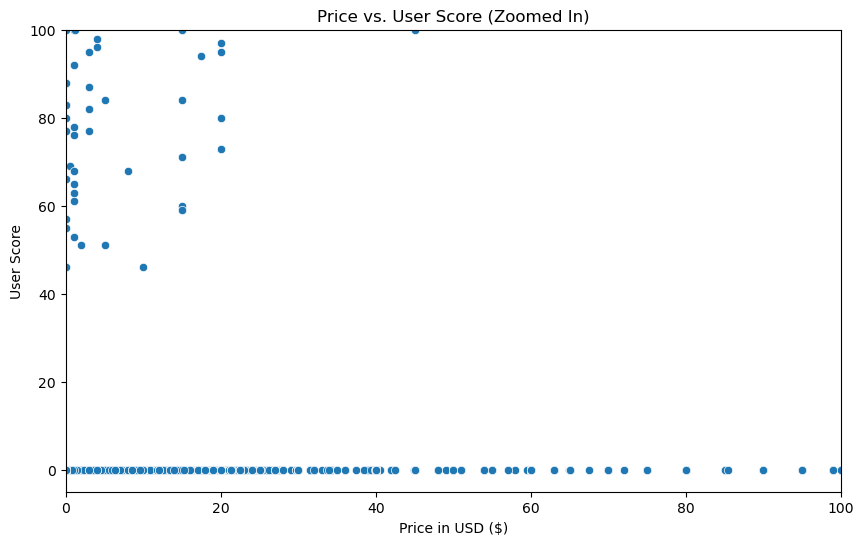

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='User score', data=df)
plt.xlim(0, 100)
plt.ylim(-5, 100)  

plt.title('Price vs. User Score (Zoomed In)')
plt.xlabel('Price in USD ($)')
plt.ylabel('User Score')
plt.show()

Genre Popularity

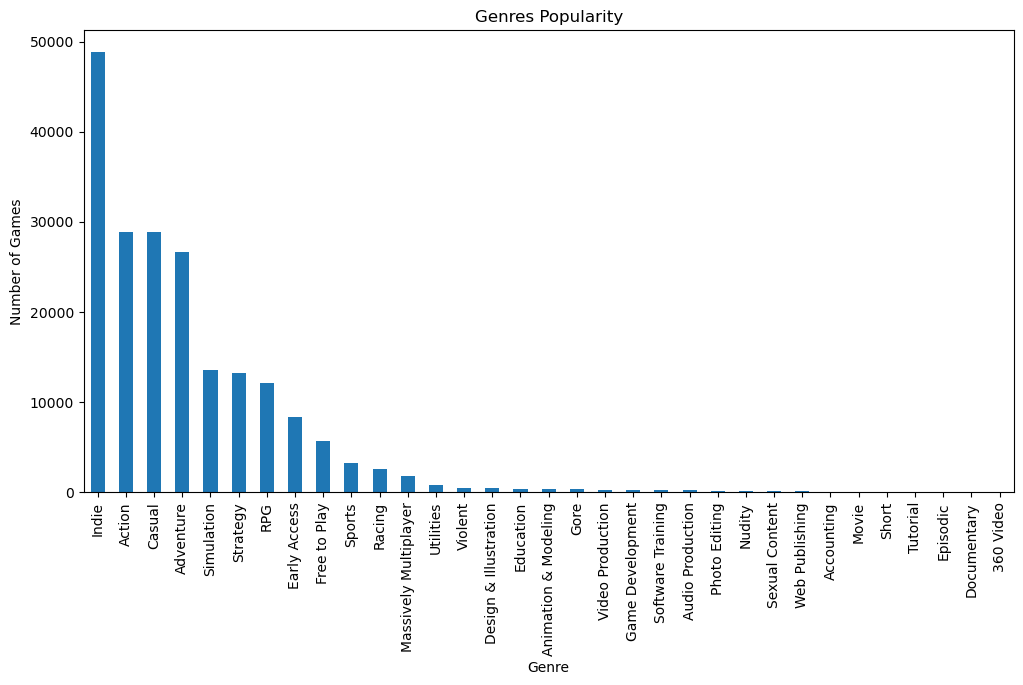

In [13]:
genre_counts = df['Genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Genres Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()


Correlation Heatmap

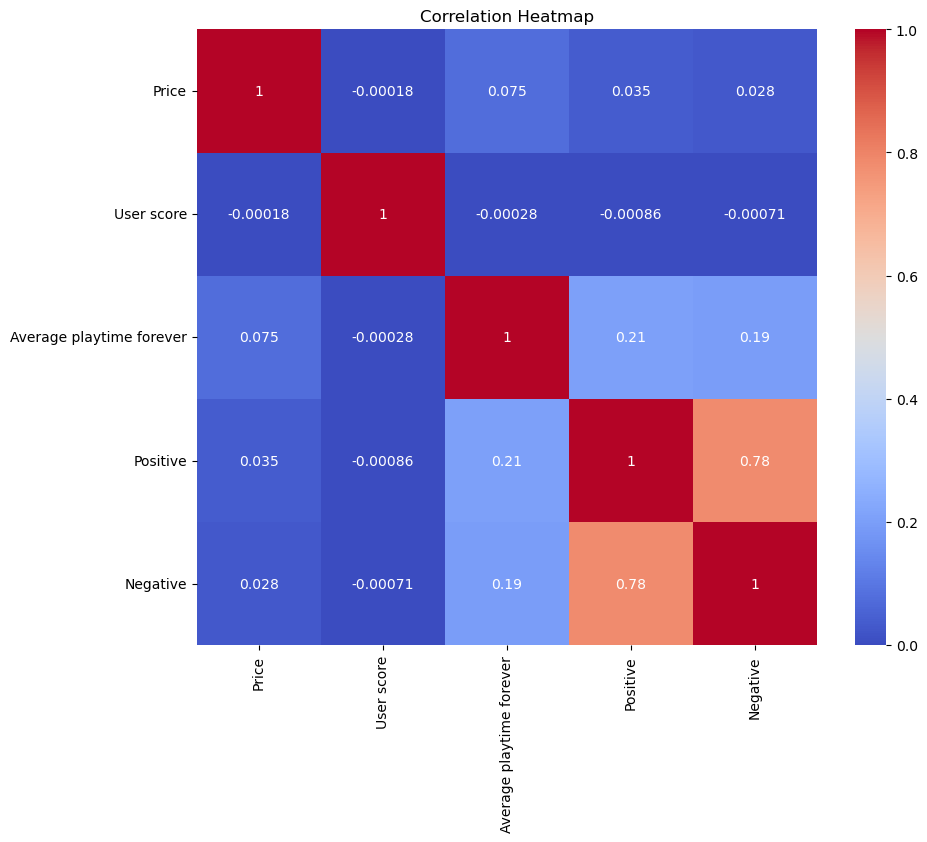

In [23]:
numerical_features = df[['Price', 'User score', 'Average playtime forever', 'Positive', 'Negative']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Positive versus negative reviews ratio

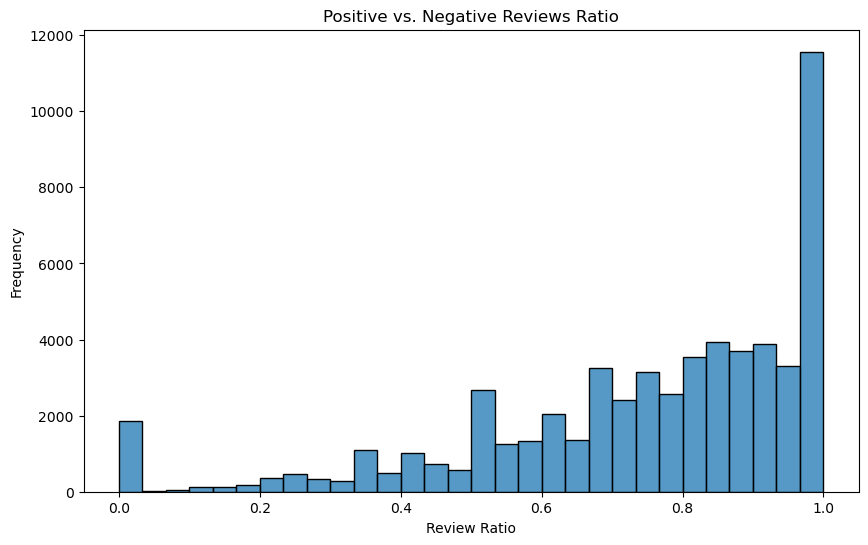

In [24]:
df['Review Ratio'] = df['Positive'] / (df['Positive'] + df['Negative'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Review Ratio'], bins=30, kde=False)
plt.title('Positive vs. Negative Reviews Ratio')
plt.xlabel('Review Ratio')
plt.ylabel('Frequency')
plt.show()